In [89]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

In [90]:
numpy.random.seed(49)

In [91]:
df = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
df.head(5)

,Passengers
0,112
1,118
2,132
3,129
4,121


In [92]:
data = df.values
data = data.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dt_sc = scaler.fit_transform(data)
dt_sc.shape

(144, 1)

In [93]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


# Функционал ошибки mean_absolute_percentage_error (MAPE)
def MAPE(y_true, y_pred): 
    y_true, y_pred = numpy.array(y_true), numpy.array(y_pred)
    return numpy.mean(numpy.abs((y_true - y_pred) / y_true)) * 100

train_size = int(len(dt_sc) * 0.7)
test_size = len(dt_sc) - train_size
train, test = dt_sc[0:train_size,:], dt_sc[train_size:len(dt_sc),:]

In [94]:
train.shape, test.shape

((100, 1), (44, 1))

In [115]:
# Constant parameters:
search_best_config = {
    'iterations': [1, 100],
    'lookback': [1,10],
    'batchsize': [1],
    'lstm_units': [16,32,64,128],
    'epochs': [1]
}

In [116]:
# Baseline (100 iters):
# Train Score: 23.00 RMSE
# Test Score: 56.49 RMSE
# MAPE Score: 9.79 %

In [117]:
def perform_lstm(iterations,lookback, batchsize, lstm_units, epochs, ii):

    look_back = lookback
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

    batch_size = batchsize
    model = Sequential()
    model.add(LSTM(lstm_units, batch_input_shape=(batch_size, look_back, 1), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(iterations):
        model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=False)
        #model.reset_states()

    trainPredict = model.predict(trainX, batch_size=batch_size)
    #model.reset_states()
    testPredict = model.predict(testX, batch_size=batch_size)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    mape = MAPE(testY[0], testPredict[:,0])
    print('MAPE Score: %.2f ' % (mape) + '%')

    trainPredictPlot = numpy.empty_like(dt_sc)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    testPredictPlot = numpy.empty_like(dt_sc)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dt_sc)-1, :] = testPredict
    
    title = str(f'LSTM Parameters... Train RMSE:{round(trainScore, 2)}, \
Test RMSE:{round(testScore,2)}, MAPE: {round(mape,2)}, iterations: {iterations}, \
lookback: {lookback}, batchsize: {batchsize}, lstm_units: {lstm_units}, epochs: {epochs}')
    
    plt.figure(figsize=(16,2))
    plt.title(title)
    plt.plot(scaler.inverse_transform(dt_sc))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    #plt.savefig('simple_lstm_animate_%i.png' % (ii + 1))
    plt.show()  
    return iterations, testScore

Train Score: 97.03 RMSE
Test Score: 75.13 RMSE
MAPE Score: 13.31 %


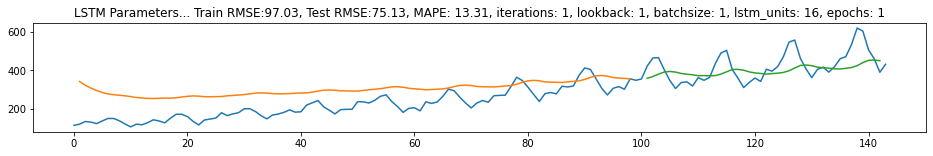

Train Score: 46.70 RMSE
Test Score: 84.14 RMSE
MAPE Score: 13.84 %


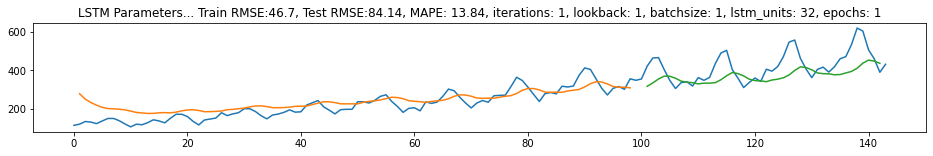

Train Score: 57.88 RMSE
Test Score: 76.48 RMSE
MAPE Score: 12.91 %


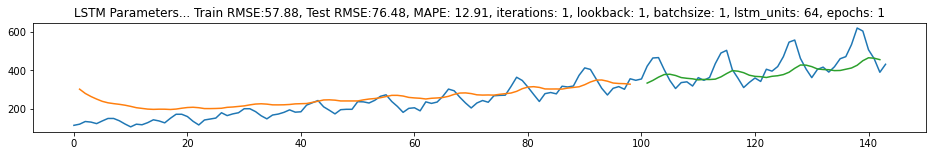

Train Score: 48.24 RMSE
Test Score: 76.78 RMSE
MAPE Score: 12.90 %


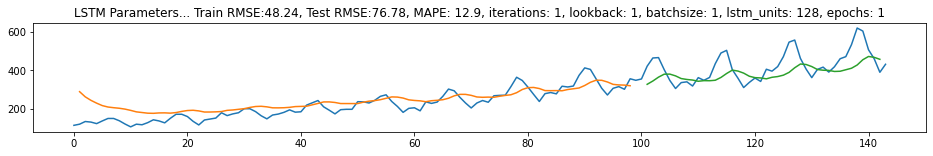

Train Score: 102.04 RMSE
Test Score: 110.17 RMSE
MAPE Score: 17.34 %


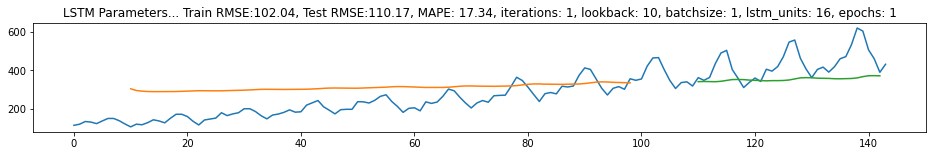

Train Score: 58.67 RMSE
Test Score: 93.75 RMSE
MAPE Score: 14.29 %


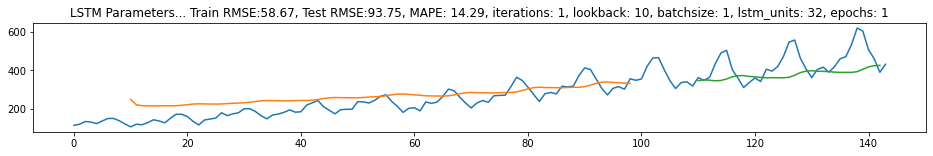

Train Score: 53.19 RMSE
Test Score: 94.25 RMSE
MAPE Score: 14.49 %


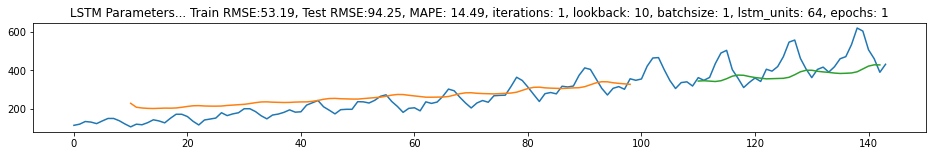

Train Score: 53.78 RMSE
Test Score: 101.78 RMSE
MAPE Score: 16.10 %


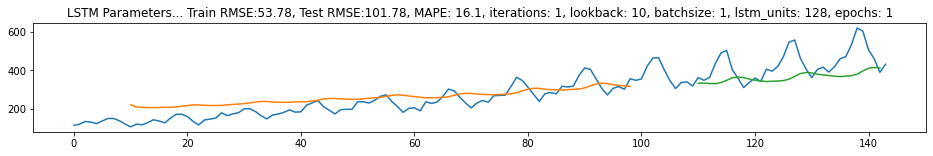

Train Score: 22.52 RMSE
Test Score: 47.64 RMSE
MAPE Score: 9.08 %


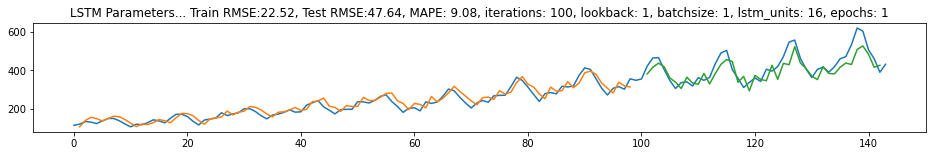

Train Score: 24.32 RMSE
Test Score: 50.70 RMSE
MAPE Score: 9.41 %


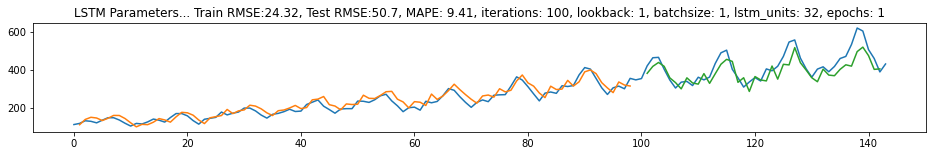

Train Score: 29.80 RMSE
Test Score: 93.67 RMSE
MAPE Score: 16.55 %


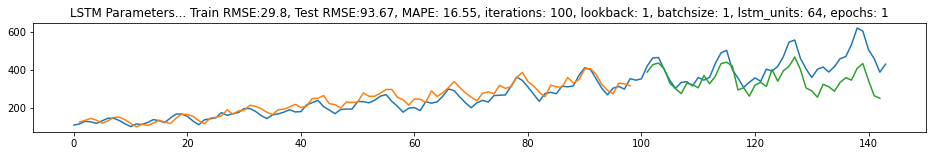

Train Score: 27.58 RMSE
Test Score: 115.73 RMSE
MAPE Score: 20.87 %


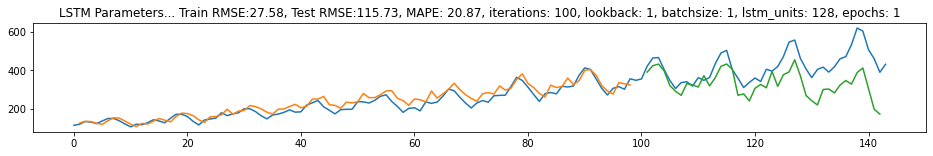

Train Score: 18.66 RMSE
Test Score: 66.25 RMSE
MAPE Score: 12.33 %


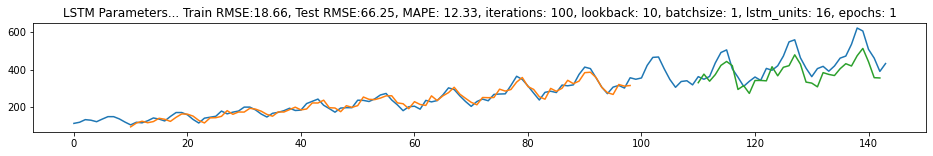

Train Score: 16.60 RMSE
Test Score: 60.35 RMSE
MAPE Score: 10.01 %


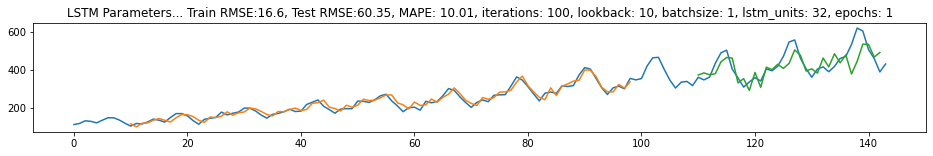

Train Score: 17.32 RMSE
Test Score: 40.38 RMSE
MAPE Score: 7.34 %


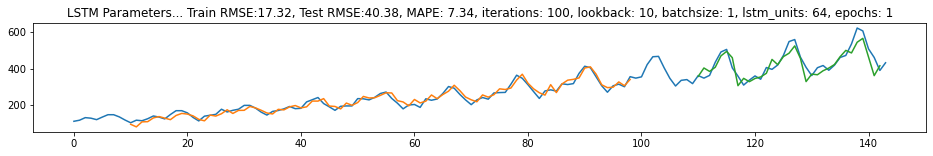

Train Score: 16.51 RMSE
Test Score: 34.43 RMSE
MAPE Score: 6.09 %


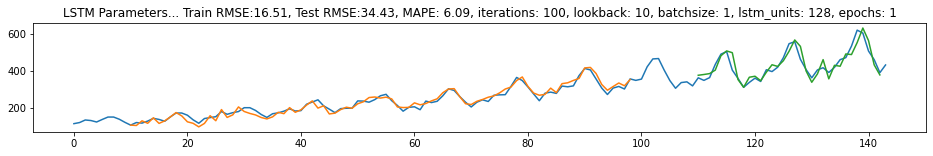

In [118]:
grid = ParameterGrid(search_best_config)
x = []
y = []
name = []

for i, params in enumerate(grid):
    iterations, testScore = perform_lstm(**params, ii=i)
    x.append(iterations)
    y.append(testScore)
    name.append(str(params.values()))

Тяжело идет ((. Пока не очень понятно с размерами тензора batch_input_shape=(batch_size, look_back, 1) и откуда вылетает ошибка Function call stack:
predict_function -> predict_function -> predict_function
В целом, понятно, что чем больше итераций тем в общем случае качество будет лучше, чем глубже в историю смотрим - тем лучше. 